## <font color = 'blue'> 2.4 常微分方程数值解 </font>

<img src = "Images/2-27.png" alt = "drawing" style = "width:500px" align = "center">

<img src = "Images/2-28.png" alt = "drawing" style = "width:500px" align = "center">

### 2.4.1 欧拉法
<img src = "Images/2-29.png" alt = "drawing" style = "width:500px" align = "center">

- 案例
<img src = "Images/2-30.png" alt = "drawing" style = "width:500px" align = "center">


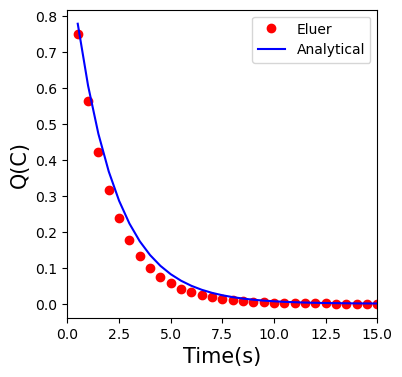

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------- 初始化 -----------------------
dt = 0.5  # 积分步长为 0.5s
rc = 2  # Tao 常数为 2s
q = 1  # 初始电量为 1C
t = 0  # 初始时刻为 0s
n = 500  # 计算 5000 个数据点

time = []  # 初始化一个时间列表
qt = []  # 初始化一个电荷列表，此列表用于存储数值解得到的各个时刻的电荷
qt_analytic = []  # 初始化一个电荷列表，此列表用于存储解析解得到的各个时刻的电荷

# --------------------- 计算数值解和解析解 ---------------------
for ii in range(n):
    t += dt
    q_analytic = np.exp(-t/rc)
    q = q - q/rc*dt
    qt.append(q)
    qt_analytic.append(q_analytic)
    time.append(t)
    
# -------------------- 作图 -------------------------
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot()
ax.plot(time, qt, 'ro', label = 'Eluer')
ax.plot(time, qt_analytic, 'b-', label = 'Analytical')
ax.set_xlabel('Time(s)', fontsize = 15)
ax.set_ylabel("Q(C)", fontsize = 15)
ax.legend(loc = 'upper right')
ax.set_xlim(0, 15)
plt.show()

- 欧拉法的截断误差
<img src = "Images/2-31.png" alt = "drawing" style = "width:400px" align = "center">

### 2.4.2 欧拉法改进
<img src = "Images/2-32.png" alt = "drawing" style = "width:400px" align = "center">

如上图，<font color = 'red'>**欧拉法实际上是利用端点的斜率代替中值斜率**</font>，但实际上是存在误差的，即前面提到的截断误差，误差是泰勒展开的二阶无穷小量。一个改进的方法是取两端斜率的平均值：

<img src = "Images/2-33.png" alt = "drawing" style = "width:500px" align = "center">

但实际上，右端斜率有待于 $y_{n+1}$ 的求取，是个很麻烦的事情。一个解决的办法是通过欧拉法预测该点处的值，然后计算该处的斜率：

<img src = "Images/2-34.png" alt = "drawing" style = "width:500px" align = "center">

<img src = "Images/2-35.png" alt = "drawing" style = "width:500px" align = "center">

- 案例
<img src = "Images/2-36.png" alt = "drawing" style = "width:500px" align = "center">


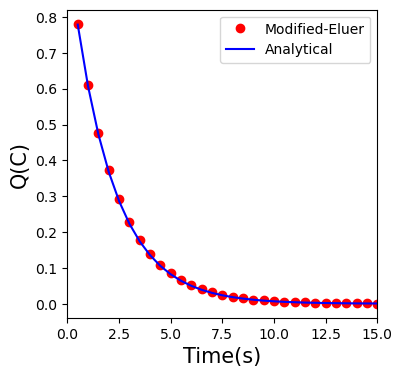

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------- 初始化 -----------------------
dt = 0.5  # 积分步长为 0.5s
rc = 2  # Tao 常数为 2s
q = 1  # 初始电量为 1C
t = 0  # 初始时刻为 0s
n = 500  # 计算 5000 个数据点

time = []  # 初始化一个时间列表
qt = []  # 改进的欧拉法计算得到的解
qt_analytic = []  # 初始化一个电荷列表，此列表用于存储解析解得到的各个时刻的电荷

# --------------------- 计算数值解和解析解 ---------------------
for ii in range(n):
    t += dt
    q_analytic = np.exp(-t/rc)
    q1 = q - q/rc*dt  # 利用欧拉法预测 t+dt 时刻的值
    q = q - 0.5*(q+q1)/rc*dt
    qt.append(q)
    qt_analytic.append(q_analytic)
    time.append(t)
    
# -------------------- 作图 -------------------------
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot()
ax.plot(time, qt, 'ro', label = 'Modified-Eluer')
ax.plot(time, qt_analytic, 'b-', label = 'Analytical')
ax.set_xlabel('Time(s)', fontsize = 15)
ax.set_ylabel("Q(C)", fontsize = 15)
ax.legend(loc = 'upper right')
ax.set_xlim(0, 15)
plt.show()


### 2.4.3 二阶龙格-库塔法

二阶龙格库塔法的原理跟改进的欧拉算法是很类似的，都是效仿高数中的中值定理，以期用一个逼近中值斜率的斜率替代端点处的斜率。<font color = 'red'>**龙格库塔法选择的斜率是中间时刻的斜率**</font>。
<img src = "Images/2-37.png" alt = "drawing" style = "width:500px" align = "center">

<img src = "Images/2-38.png" alt = "drawing" style = "width:500px" align = "center">

- 案例

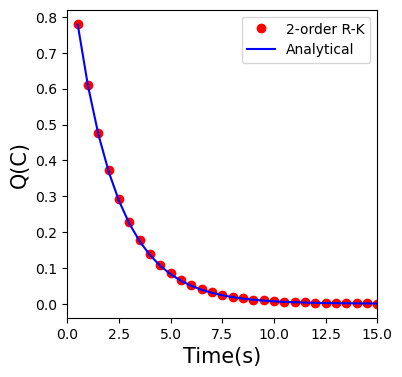

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------- 初始化 -----------------------
dt = 0.5  # 积分步长为 0.5s
rc = 2  # Tao 常数为 2s
q = 1  # 初始电量为 1C
t = 0  # 初始时刻为 0s
n = 500  # 计算 5000 个数据点

time = []  # 初始化一个时间列表
qt = []  # 二阶龙格库塔法计算得到的解
qt_analytic = []  # 初始化一个电荷列表，此列表用于存储解析解得到的各个时刻的电荷

# --------------------- 计算数值解和解析解 ---------------------
for ii in range(n):
    t += dt
    q_analytic = np.exp(-t/rc)
    q1 = q - 0.5*q/rc*dt  # 利用欧拉法预测 t+dt/2 时刻处的值
    q = q - q1/rc*dt
    qt.append(q)
    qt_analytic.append(q_analytic)
    time.append(t)
    
# -------------------- 作图 -------------------------
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot()
ax.plot(time, qt, 'ro', label = '2-order R-K')
ax.plot(time, qt_analytic, 'b-', label = 'Analytical')
ax.set_xlabel('Time(s)', fontsize = 15)
ax.set_ylabel("Q(C)", fontsize = 15)
ax.legend(loc = 'upper right')
ax.set_xlim(0, 15)
plt.show()


### 2.4.4 四阶龙格-库塔法

<img src = "Images/2-39.png" alt = "drawing" style = "width:500px" align = "center">

这里说一下 $k_1, k_2, k_3, k_4$ 的物理意义:
- $k_1$:左端点的斜率
- $k_2$:基于$k_1$通过欧拉法预测的 t+dt/2 时刻的斜率
- $k_3$:将 $k_2$ 当作斜率，从 t 时刻通过欧拉法预测的 t+dt/2 时刻的斜率
- $k_4$:将 $k_3$ 当作斜率，从 t 时刻通过欧拉法预测的 t+dt 时刻的斜率

<img src = "Images/2-40.png" alt = "drawing" style = "width:500px" align = "center">

- 案例

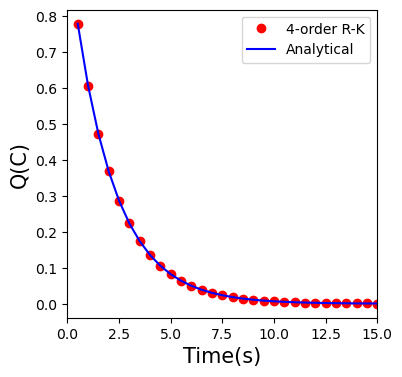

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------- 初始化 -----------------------
dt = 0.5  # 积分步长为 0.5s
rc = 2  # Tao 常数为 2s
q = 1  # 初始电量为 1C
t = 0  # 初始时刻为 0s
n = 500  # 计算 5000 个数据点

time = []  # 初始化一个时间列表
qt = []  # 二阶龙格库塔法计算得到的解
qt_analytic = []  # 初始化一个电荷列表，此列表用于存储解析解得到的各个时刻的电荷

# --------------------- 计算数值解和解析解 ---------------------
for ii in range(n):
    t += dt
    q_analytic = np.exp(-t/rc)
    
    k1 = -q/rc
    k2 = -(q+k1*dt/2)/rc
    k3 = -(q+k2*dt/2)/rc
    k4 = -(q+k3*dt)/rc
    k = (k1+2*k2+2*k3+k4)/6
    
    q = q + k*dt
    qt.append(q)
    qt_analytic.append(q_analytic)
    time.append(t)
    
# -------------------- 作图 -------------------------
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot()
ax.plot(time, qt, 'ro', label = '4-order R-K')
ax.plot(time, qt_analytic, 'b-', label = 'Analytical')
ax.set_xlabel('Time(s)', fontsize = 15)
ax.set_ylabel("Q(C)", fontsize = 15)
ax.legend(loc = 'upper right')
ax.set_xlim(0, 15)
plt.show()


### 2.4.5 二阶常微分方程求解

<img src = "Images/2-41.png" alt = "drawing" style = "width:500px" align = "center">

对于二阶常微分方程 $\frac{d^2}{dt^2}y(t) = f(t,y)$ 而言，可以令 $x = \frac{d}{dt}y(t) = g(t,x,y)$, 从而原二阶常微分方程等效为 $\frac{d}{dt}x(t) = f(t, x, y)$，并进而可以通过求解一阶常微分方程的方式进行求解：
<img src = "Images/2-42.png" alt = "drawing" style = "width:500px" align = "center">

<img src = "Images/2-43.png" alt = "drawing" style = "width:500px" align = "center">

- 四阶龙格库塔法求解二阶常微分方程

<img src = "Images/2-44.png" alt = "drawing" style = "width:500px" align = "center">

<img src = "Images/2-45.png" alt = "drawing" style = "width:500px" align = "center">

Text(0, 0.5, '$\\omega$')

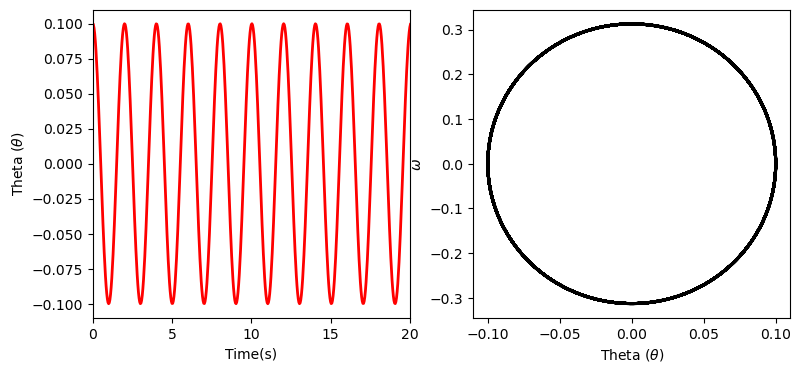

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------ 初始化 -------------------------------
t = 0  # 初始化的时刻
g = 9.8  # 重力加速度
xl = 1  # 绳子长度
dt = 0.04  # 计算时间步长
n = 2000  # 计算步数
theta = 0.1  # 初始角度
omega = 0  # 初始ω值
theta_t = []  # 绳子角度随时间变化
omega_t = []  # 绳子角加速度随时间变化
time = []  #  时间

# ----------------------------- 龙格库塔法计算微分方程 ------------------------
for ii in range(n):
    k1 = -g/xl*theta
    l1 = omega
    k2 = -g/xl*(theta + l1*dt/2)
    l2 = omega + k1*dt/2
    k3 = -g/xl*(theta + l2*dt/2)
    l3 = omega + k2*dt/2
    k4 = -g/xl*(theta + l3*dt)
    l4 = omega + k3*dt
    
    k = (k1 + k4 + 2*(k2 + k3))/6
    l = (l1 + l4 + 2*(l2 + l3))/6
    
    t = t + dt
    time.append(t)
    theta = theta + l*dt
    omega = omega + k*dt
    theta_t.append(theta)
    omega_t.append(omega)
    
# ----------------------------- 作图 ------------------------------
fig = plt.figure(figsize = (9,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(time, theta_t, 'r-', linewidth = 2)
ax1.set_xlim(0, 20)
ax1.set_xlabel('Time(s)')
ax1.set_ylabel(r'Theta ($\theta$)')

ax2.plot(theta_t, omega_t, 'k-', linewidth = 2)
ax2.set_xlabel(r'Theta ($\theta$)')
ax2.set_ylabel(r'$\omega$')

- 含阻尼的二阶常微分方程

<img src = "Images/2-46.png" alt = "drawing" style = "width:500px" align = "center">

<img src = "Images/2-47.png" alt = "drawing" style = "width:500px" align = "center">

<img src = "Images/2-48.png" alt = "drawing" style = "width:500px" align = "center">

Text(0, 0.5, '$\\omega$')

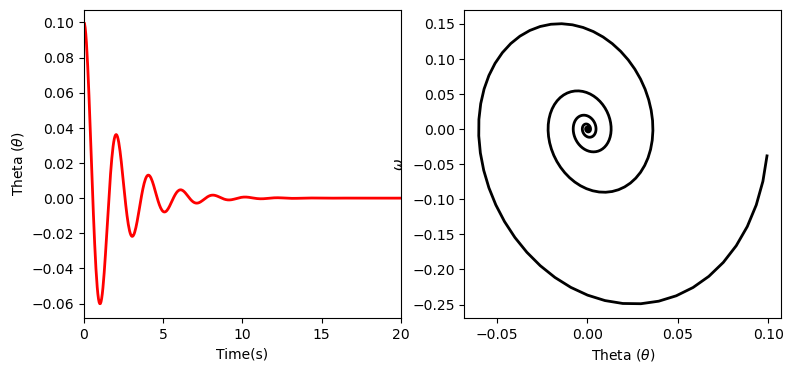

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------ 初始化 -------------------------------
t = 0  # 初始化的时刻
g = 9.8  # 重力加速度
xl = 1  # 绳子长度
q = 1  # 阻尼系数
dt = 0.04  # 计算时间步长
n = 2000  # 计算步数
theta = 0.1  # 初始角度
omega = 0  # 初始ω值
theta_t = []  # 绳子角度随时间变化
omega_t = []  # 绳子角加速度随时间变化
time = []  #  时间

# ----------------------------- 龙格库塔法计算微分方程 ------------------------
for ii in range(n):
    k1 = -g/xl*theta - q*omega
    l1 = omega
    k2 = -g/xl*(theta + l1*dt/2) - q*(omega + k1*dt/2)
    l2 = omega + k1*dt/2
    k3 = -g/xl*(theta + l2*dt/2) - q*(omega + k2*dt/2)
    l3 = omega + k2*dt/2
    k4 = -g/xl*(theta + l3*dt) - q*(omega + k3*dt)
    l4 = omega + k3*dt
    
    k = (k1 + k4 + 2*(k2 + k3))/6
    l = (l1 + l4 + 2*(l2 + l3))/6
    
    t = t + dt
    time.append(t)
    theta = theta + l*dt
    omega = omega + k*dt
    theta_t.append(theta)
    omega_t.append(omega)
    
# ----------------------------- 作图 ------------------------------
fig = plt.figure(figsize = (9,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(time, theta_t, 'r-', linewidth = 2)
ax1.set_xlim(0, 20)
ax1.set_xlabel('Time(s)')
ax1.set_ylabel(r'Theta ($\theta$)')

ax2.plot(theta_t, omega_t, 'k-', linewidth = 2)
ax2.set_xlabel(r'Theta ($\theta$)')
ax2.set_ylabel(r'$\omega$')

- 有周期性的外力
<img src = "Images/2-49.png" alt = "drawing" style = "width:500px" align = "center">

<img src = "Images/2-50.png" alt = "drawing" style = "width:500px" align = "center">

<img src = "Images/2-51.png" alt = "drawing" style = "width:500px" align = "center">

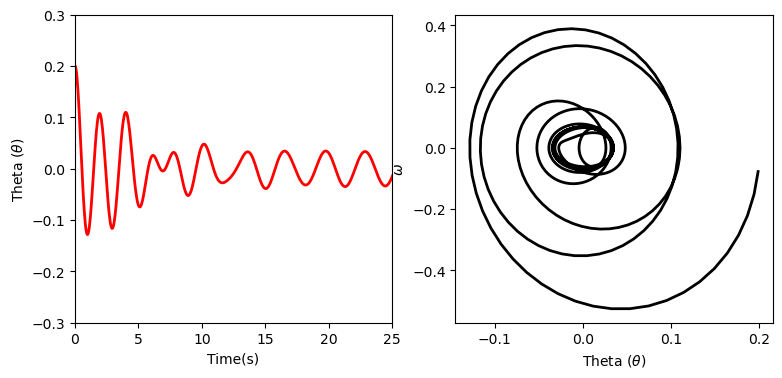

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------ 初始化 -------------------------------
t = 0  # 初始化的时刻
g = 9.8  # 重力加速度
xl = 1  # 绳子长度
q = 0.5  # 阻尼系数
F = 0.2  # 驱动力大小
W = 2  # 驱动力周期
dt = 0.04  # 计算时间步长
n = 2000  # 计算步数
theta = 0.2  # 初始角度
omega = 0  # 初始ω值
theta_t = []  # 绳子角度随时间变化
omega_t = []  # 绳子角加速度随时间变化
time = []  #  时间

# ----------------------------- 龙格库塔法计算微分方程 ------------------------
for ii in range(n):
    k1 = -g/xl*theta - q*omega + F*np.sin(W*t)
    l1 = omega
    k2 = -g/xl*(theta + l1*dt/2) - q*(omega + k1*dt/2) + F*np.sin(W*t)
    l2 = omega + k1*dt/2
    k3 = -g/xl*(theta + l2*dt/2) - q*(omega + k2*dt/2) + F*np.sin(W*t)
    l3 = omega + k2*dt/2
    k4 = -g/xl*(theta + l3*dt) - q*(omega + k3*dt) + F*np.sin(W*t)
    l4 = omega + k3*dt
    
    k = (k1 + k4 + 2*(k2 + k3))/6
    l = (l1 + l4 + 2*(l2 + l3))/6
    
    t = t + dt
    time.append(t)
    theta = theta + l*dt
    omega = omega + k*dt
    theta_t.append(theta)
    omega_t.append(omega)
    
# ----------------------------- 作图 ------------------------------
fig = plt.figure(figsize = (9,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(time, theta_t, 'r-', linewidth = 2)
ax1.set_xlim(0, 25)
ax1.set_ylim(-0.3, 0.3)
ax1.set_xlabel('Time(s)')
ax1.set_ylabel(r'Theta ($\theta$)')

ax2.plot(theta_t, omega_t, 'k-', linewidth = 2)
ax2.set_xlabel(r'Theta ($\theta$)')
ax2.set_ylabel(r'$\omega$')
plt.show()

- 非线性常微分方程

当初始摆角较大时，已经无法将 $sin(\theta)$ 近似为 $\theta$ 了，此时需要将重力引入的加速度完全代入，此时方程变为非线性常微分方程：

<img src = "Images/2-52.png" alt = "drawing" style = "width:500px" align = "center">


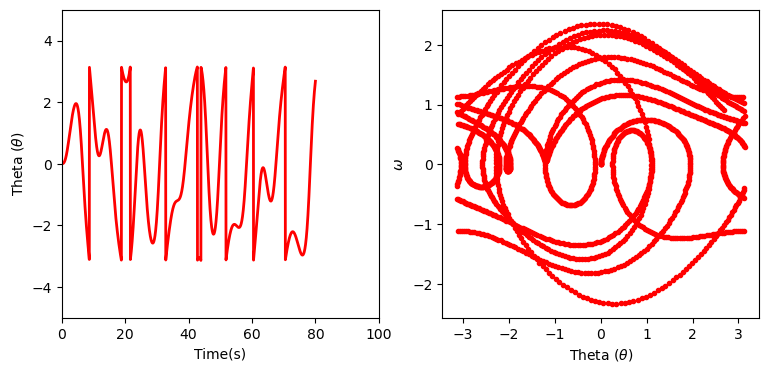

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------ 初始化 -------------------------------
t = 0  # 初始化的时刻
g = 9.8  # 重力加速度
xl = 9.8  # 绳子长度
q = 0.5  # 阻尼系数
F = 1.2  # 驱动力大小
W = 2/3  # 驱动力周期
dt = 0.04  # 计算时间步长
n = 2000  # 计算步数
theta = 0  # 初始角度
omega = 0  # 初始ω值
theta_t = []  # 绳子角度随时间变化
omega_t = []  # 绳子角加速度随时间变化
time = []  #  时间

# ----------------------------- 龙格库塔法计算微分方程 ------------------------
for ii in range(n):
    k1 = -g/xl*np.sin(theta) - q*omega + F*np.sin(W*t)
    l1 = omega
    k2 = -g/xl*np.sin(theta + l1*dt/2) - q*(omega + k1*dt/2) + F*np.sin(W*t)
    l2 = omega + k1*dt/2
    k3 = -g/xl*np.sin(theta + l2*dt/2) - q*(omega + k2*dt/2) + F*np.sin(W*t)
    l3 = omega + k2*dt/2
    k4 = -g/xl*np.sin(theta + l3*dt) - q*(omega + k3*dt) + F*np.sin(W*t)
    l4 = omega + k3*dt
    
    k = (k1 + k4 + 2*(k2 + k3))/6
    l = (l1 + l4 + 2*(l2 + l3))/6
    
    t = t + dt
    time.append(t)
    theta = theta + l*dt
    omega = omega + k*dt
    
    if theta > np.pi:
        theta = theta - 2*np.pi
    elif theta< -np.pi:
        theta = theta + 2*np.pi
        
    theta_t.append(theta)
    omega_t.append(omega)
    
# ----------------------------- 作图 ------------------------------
fig = plt.figure(figsize = (9,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(time, theta_t, 'r-', linewidth = 2)
ax1.set_xlim(0, 100)
ax1.set_ylim(-5, 5)
ax1.set_xlabel('Time(s)')
ax1.set_ylabel(r'Theta ($\theta$)')

ax2.plot(theta_t, omega_t, 'r.', linewidth = 2)
ax2.set_xlabel(r'Theta ($\theta$)')
ax2.set_ylabel(r'$\omega$')
plt.show()

以上即是混动现象，可以更改 $\theta$ 等参数，可以发现混沌现象对初值很敏感，其来源即是常微分方程的非线性。

### 2.4.6 数值法求解常微分方程总结
                                                                       
<img src = "Images/2-53.png" alt = "drawing" style = "width:500px" align = "center">

- 应用举例之一：理解浑沌运动的由来

<img src = "Images/2-54.png" alt = "drawing" style = "width:500px" align = "center">

<img src = "Images/2-55.png" alt = "drawing" style = "width:500px" align = "center">

- 应用举例之二：生物钟的由来

<img src = "Images/2-60.png" alt = "drawing" style = "width:500px" align = "center">

作者认为，生物节律来源于细胞内蛋白质转录的负反馈，在反馈作用下，整个循环周期震荡往复。如下图所示。解释一下下图中的参数，小写字母表示 DNA，比如 per，与之相对应的大写则表示该 DNA 所转录的蛋白质，比如 PER。酶催化速率通过米氏方程描述，所有参数都已知，只有浓度未知。

<img src = "Images/2-61.png" alt = "drawing" style = "width:500px" align = "center">

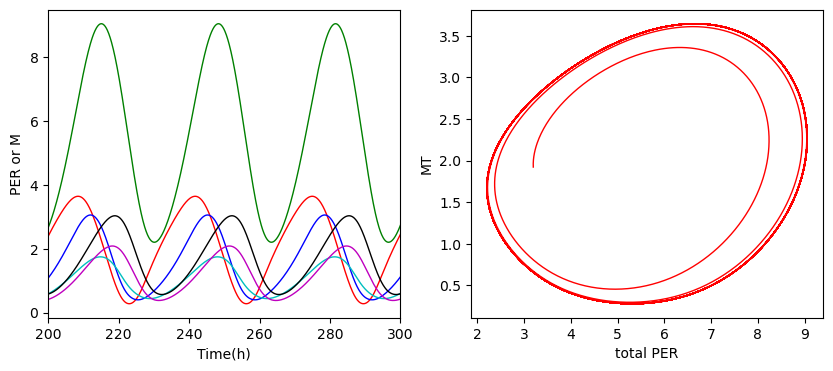

In [17]:
import matplotlib.pyplot as plt

# -------------------- 参数 -----------------------------
vs = 0.76
vm = 0.65 
vd = 0.95
ks = 0.38
k1 = 1.9
k2 = 1.3
V1 = 3.2
V2 = 1.58
V3 = 5.0
V4 = 2.5
K1 = 2.0
K2 = 2.0
K3 = 2.0
K4 = 2.0
Ki = 1.0
Km = 0.5
Kd = 0.2

# -------------------- 初始化 -------------------------
t = 0
dt = 0.1
n = 10000 
M = 1.9  # per 转录 RNA 的初始浓度
P0 = 0.8  # PER0 蛋白质的初始浓度
P1 = 0.8  # PER1 蛋白质的初始浓度
P2 = 0.8  # PER2 蛋白质的初始浓度
Pn = 0.8  # PERn 蛋白质的初始浓度

# ----------------------- 函数定义 ------------------------
def fM(M, Pn):
    freturn = vs*K1**4/(K1**4+Pn**4) - vm*M/(Km+M)
    return freturn

def fP0(M, P0, P1):
    freturn = ks*M - V1*P0/(K1+P0) + V2*P1/(K2+P1)
    return freturn

def fP1(P0, P1, P2):
    freturn = V1*P0/(K1+P0) - V2*P1/(K2+P1) - V3*P1/(K3+P1) + V4*P2/(K4+P2)
    return freturn

def fP2(P1, P2, Pn):
    freturn = V3*P1/(K3+P1) - V4*P2/(K4+P2) - k1*P2 + k2*Pn - vd*P2/(Kd+P2)
    return freturn

def fPn(P2, Pn):
    freturn = k1*P2 - k2*Pn
    return freturn

# ----------------------- 定义空列表 --------------------------
MT = []  # per 浓度随时间变化的列表
P0T = []  # PER0 浓度随时间变化的列表
P1T = []  # PER1 浓度随时间变化的列表
P2T = []  # PER2 浓度随时间变化的列表
PnT = []  # PERn 浓度随时间变化的列表
PtT = []  # PER0 浓度随时间变化的列表
Time = []  # 时刻列表

# ----------------------- 四阶龙格-库塔法 ---------------------
for ii in range(n):
    k1_m = fM(M, Pn)
    k1_0 = fP0(M, P0, P1)
    k1_1 = fP1(P0, P1, P2)
    k1_2 = fP2(P1, P2, Pn)
    k1_n = fPn(P2, Pn)
    
    k2_m = fM (M  + k1_m*dt/2, Pn + k1_n*dt/2)
    k2_0 = fP0(M  + k1_m*dt/2, P0 + k1_0*dt/2, P1 + k1_1*dt/2)
    k2_1 = fP1(P0 + k1_0*dt/2, P1 + k1_1*dt/2, P2 + k1_2*dt/2)
    k2_2 = fP2(P1 + k1_1*dt/2, P2 + k1_2*dt/2, Pn + k1_n*dt/2)
    k2_n = fPn(P2 + k1_2*dt/2, Pn + k1_n*dt/2)
    
    k3_m = fM (M  + k2_m*dt/2, Pn + k2_n*dt/2)
    k3_0 = fP0(M  + k2_m*dt/2, P0 + k2_0*dt/2, P1 + k2_1*dt/2)
    k3_1 = fP1(P0 + k2_0*dt/2, P1 + k2_1*dt/2, P2 + k2_2*dt/2)
    k3_2 = fP2(P1 + k2_1*dt/2, P2 + k2_2*dt/2, Pn + k2_n*dt/2)
    k3_n = fPn(P2 + k2_2*dt/2, Pn + k2_n*dt/2)
    
    k4_m = fM (M  + k3_m*dt, Pn + k3_n*dt)
    k4_0 = fP0(M  + k3_m*dt, P0 + k3_0*dt, P1 + k3_1*dt)
    k4_1 = fP1(P0 + k3_0*dt, P1 + k3_1*dt, P2 + k3_2*dt)
    k4_2 = fP2(P1 + k3_1*dt, P2 + k3_2*dt, Pn + k3_n*dt)
    k4_n = fPn(P2 + k3_2*dt, Pn + k3_n*dt)
    
    M  = M  + (k1_m + k4_m + 2*(k2_m+k3_m))/6*dt
    P0 = P0 + (k1_0 + k4_0 + 2*(k2_0+k3_0))/6*dt
    P1 = P1 + (k1_1 + k4_1 + 2*(k2_1+k3_1))/6*dt
    P2 = P2 + (k1_2 + k4_2 + 2*(k2_2+k3_2))/6*dt
    Pn = Pn + (k1_n + k4_n + 2*(k2_n+k3_n))/6*dt
    Pt = P0 + P1 + P2 + Pn
    t = t + dt
    
    MT.append(M)
    P0T.append(P0)
    P1T.append(P1)
    P2T.append(P2)
    PnT.append(Pn)
    PtT.append(Pt)
    Time.append(t)
    
# ------------------- 作图 ------------------------
fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(Time, MT,  'r-', linewidth = 1.0, label = 'M')
ax1.plot(Time, P0T, 'b-', linewidth = 1.0, label = 'P0')
ax1.plot(Time, P1T, 'c-', linewidth = 1.0, label = 'P1')
ax1.plot(Time, P2T, 'm-', linewidth = 1.0, label = 'P2')
ax1.plot(Time, PnT, 'k-', linewidth = 1.0, label = 'Pn')
ax1.plot(Time, PtT, 'g-', linewidth = 1.0, label = 'Pt')
ax1.set_xlim(200, 300)
    
ax2.plot(PtT, MT, 'r-', linewidth = 1.0)

ax1.set_xlabel(r'Time(h)')
ax1.set_ylabel(r'PER or M')

ax2.set_xlabel(r'total PER')
ax2.set_ylabel(r'MT')

plt.show()

<font color = 'red'>**计算结果跟老师的结果没对上，也不知道问题在哪儿，但步骤就是真么个步骤，可能是一些细节上的问题吧，就不管了。老师的结果如下：**</font>

<img src = "Images/2-62.png" alt = "Drawing" align = 'center' style = 'width:500px'>

In [14]:
100/24

4.166666666666667